# Ramen Classification

**Goal**: Accurately predict a ramen's rating (Stars) using the brand, variety, style and country of the ramen.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('ramen-ratings.csv')
df.head(3)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN


# Tidying Data (dtypes, nulls, etc)

In [3]:
### Identify dtypes that need to be fixed ###
df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [4]:
### Cast review number as string ###
df['Review #'] = df['Review #'].astype('str')
### Identify non-float numbers in Stars column ###
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [5]:
### Locate the index of non-float values in Stars ###
df[df.Stars == 'Unrated']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [6]:
### Drop those indices ###
df = df.drop([32,122,993])

In [7]:
### Cast Stars as float ###
df['Stars'] = df['Stars'].astype('float')
df.dtypes

Review #     object
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
Top Ten      object
dtype: object

In [8]:
### Identify low-count values in Style ###
df.Style.value_counts()

Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [9]:
### Locate indices of low-count Style ###
df[df.Style == 'Box']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
36,2544,Lipton,Cup-A-Soup Chicken Noodle With White Meat Inst...,Box,USA,1.50,NaN
80,2500,The Ramen Rater Select,Supreme Creamy Tom Yum Noodle,Box,Malaysia,5.00,NaN
139,2441,MyKuali,Penang Hokkien Prawn Flavor Noodle,Box,Japan,5.00,NaN
161,2419,MyKuali,Penang Red Tom Yum Goong,Box,Japan,5.00,NaN
203,2377,MyKuali,Penang White Curry Instant Noodle (Japan Version),Box,Malaysia,5.00,NaN
1471,1109,La Fonte,Spaghetti With Bolognese Sauce,Box,Indonesia,4.25,NaN


In [10]:
### Drop those indices ###
df.drop([36,80,139,161,203,1471], inplace=True)

In [11]:
### Locate more indices of low-count Styles ###
df[(df.Style == 'Can') | (df.Style == 'Bar')]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
67,2513,Pringles,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,USA,3.5,NaN
1425,1155,Komforte Chockolates,Savory Ramen,Bar,USA,5.0,NaN


In [12]:
### Drop those indices ###
df.drop([67,1425], inplace=True)

In [13]:
### Check work ###
df.Style.unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', nan], dtype=object)

In [14]:
### Check null counts ###
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2528
dtype: int64

In [15]:
### Identify indices for null Style ###
df[df.Style.isna()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3.00,NaN


In [16]:
### Drop those indices ###
df.drop([2152, 2442], inplace=True)

In [17]:
### Check work ###
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
Top Ten     2526
dtype: int64

In [18]:
### Drop high-nulls column Top Ten ###
df.drop(columns='Top Ten', inplace=True)
df.head(3)

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25


In [19]:
### Check value counts per Brand ###
df.Brand.value_counts().head(10)

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     51
Ottogi            45
Lucky Me!         34
Name: Brand, dtype: int64

In [20]:
### Check value counts per variety ###
df.Variety.value_counts() # 2400 unique values, too many to plot

Chicken                                 7
Beef                                    7
Yakisoba                                6
Vegetable                               6
Artificial Chicken                      6
                                       ..
Otentiq Cheezy Curry Instant Noodles    1
Mi Goreng Dengan Abon                   1
Grilled Pork Flavour Instant Noodles    1
Hao Hao Sate Onion Flavour              1
Tom Yum Chili Flavor                    1
Name: Variety, Length: 2400, dtype: int64

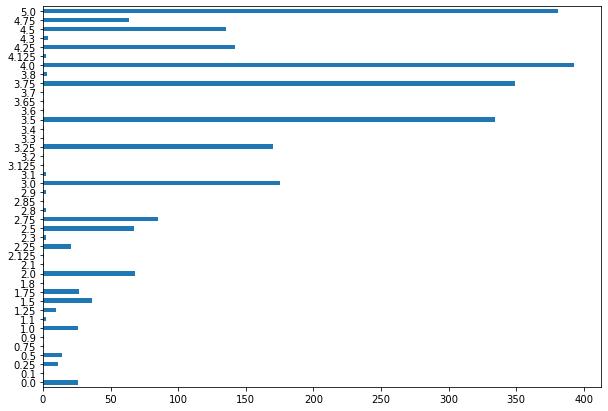

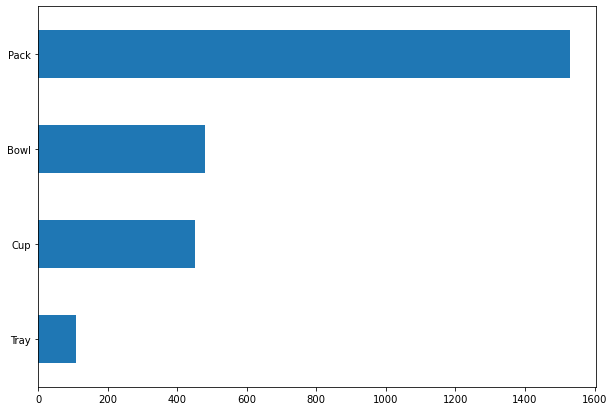

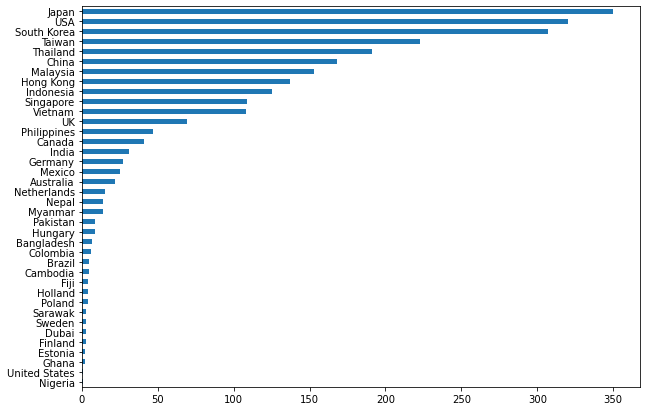

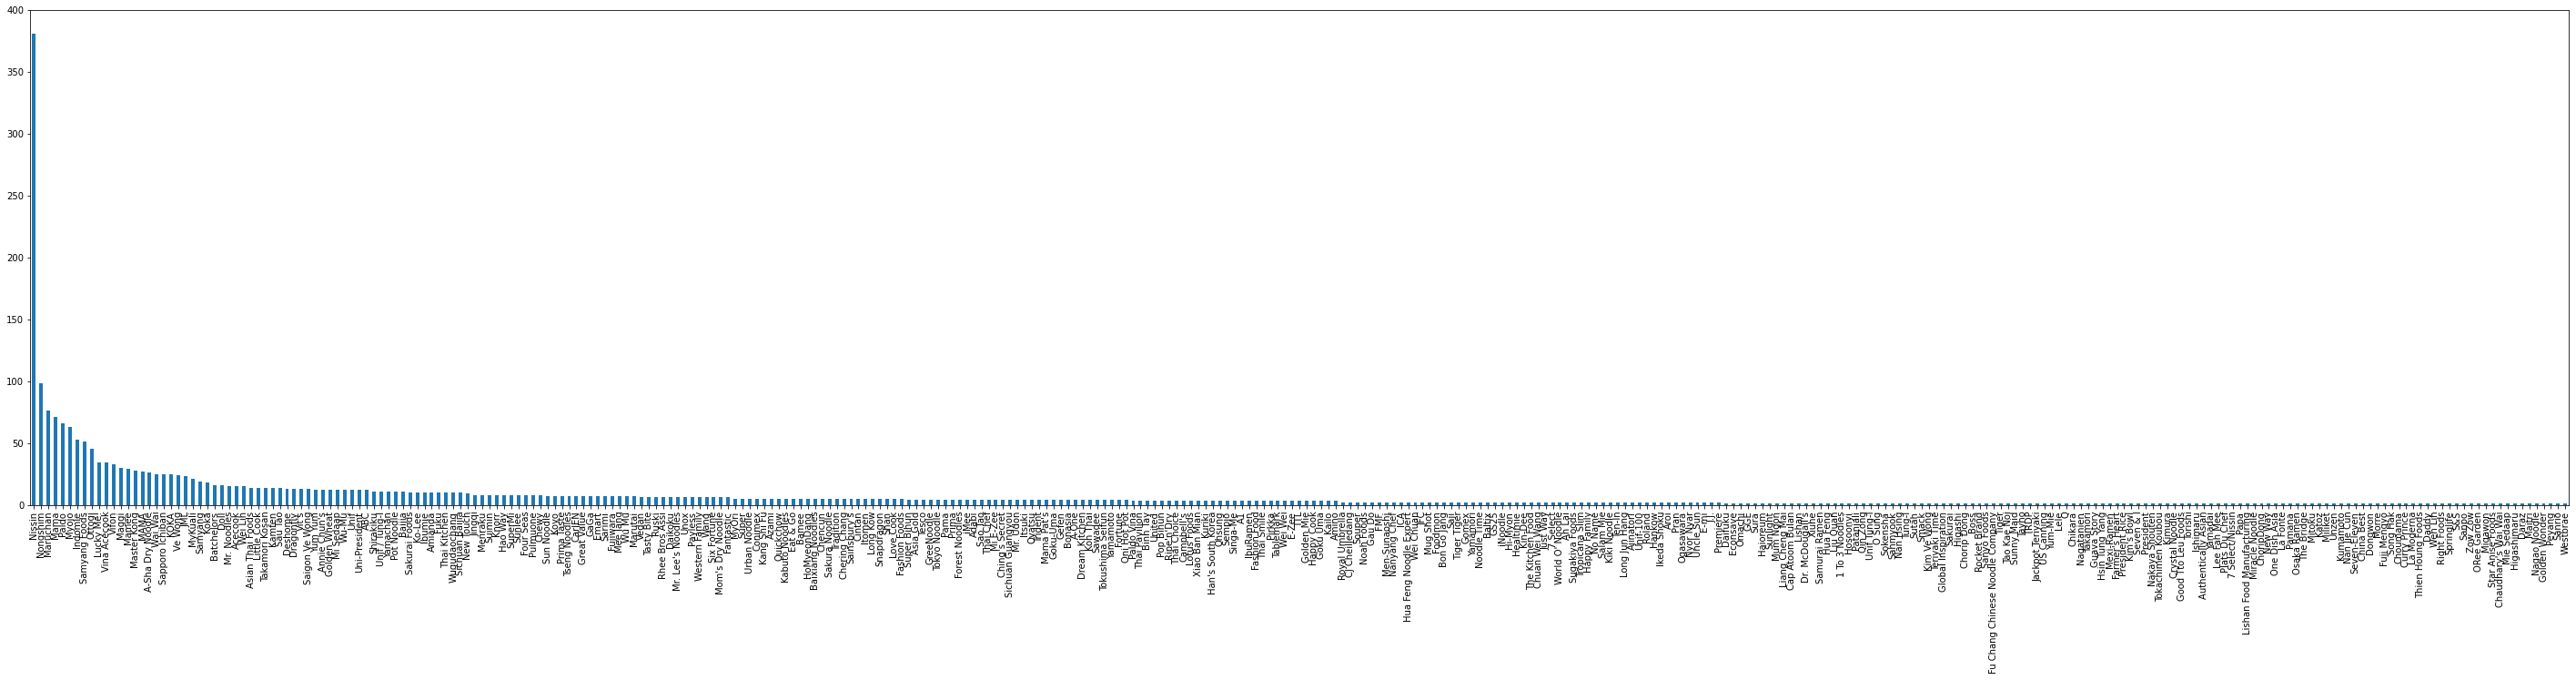

In [21]:
### Plot distributions ###
## Count by Stars ##
plt.figure(figsize=(10,7))
df.Stars.value_counts().sort_index().plot(kind='barh')
plt.show()
## Count by Styles ##
plt.figure(figsize=(10,7))
df.Style.value_counts(ascending=True).plot(kind='barh')
plt.show()
## Count by Country ##
plt.figure(figsize=(10,7))
df.Country.value_counts(ascending=True).plot(kind='barh')
plt.show()
## Count by Brand ##
plt.figure(figsize=(50,10))
df.Brand.value_counts().plot(kind='bar')
plt.show()

# Split Data

In [22]:
### Split into subsets ###
train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=0.25, random_state=123)
### Isolate targets ###
X_train, y_train = train.drop(columns='Stars'), train.Stars
X_validate, y_validate = validate.drop(columns='Stars'), validate.Stars
X_test, y_test = test.drop(columns='Stars'), test.Stars

# Explore Data

## Do bowls rank statistically higher than cups?
Confidence interval: 95%

$H_0$: Bowls do not rank statistically higher than cups.

$H_a$: Bowls rank statistically higher than cups.

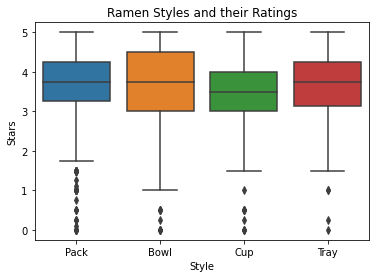

In [23]:
### Visualize Comparison ###
sns.boxplot(data=train, x='Style', y='Stars')
plt.title('Ramen Styles and their Ratings')
plt.show()

In [24]:
### Hypothesis Testing ###
alpha = .05
t, p = stats.mannwhitneyu(train[train.Style == 'Bowl'].Stars, 
                          train[train.Style == 'Cup'].Stars,
                          alternative='greater')

if t > 0 and p < alpha:
    print('Bowls rank statistically higher than cups. We reject the null hypothesis with 95% confidence.')
else:
    print('Bowls do not rank statistically higher than cups. Results do not breach the 95% confidence threshold.')

Bowls rank statistically higher than cups. We reject the null hypothesis with 95% confidence.


## Does Japan produce better ramen than USA?
Confidence interval: 95%

$H_0$: Japan does not statistically produce better-rated ramen than USA.

$H_a$: Japan statistically produces better-rated ramen than USA.

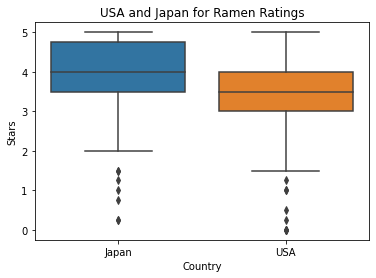

In [25]:
### Visualize comparison ##
sns.boxplot(data=train[(train.Country == 'Japan') | (train.Country == 'USA')], 
           x='Country',
           y='Stars')
plt.title('USA and Japan for Ramen Ratings')
plt.show()

In [26]:
### Hypothesis Testing ###
alpha = .05
t, p = stats.mannwhitneyu(train[train.Country == 'Japan'].Stars, 
                          train[train.Country == 'USA'].Stars,
                          alternative='greater')

if t > 0 and p < alpha:
    print('Japan statistically produces better-rated ramen than USA.\n\
            We reject the null hypothesis with 95% confidence.')
else:
    print('Japan does not statistically produce better-rated ramen than USA.\n\
            Results do not breach the 95% confidence threshold.')

Japan statistically produces better-rated ramen than USA.
            We reject the null hypothesis with 95% confidence.


## Does Japan produce better ramen than the countries with over 100 ramen reviews?
Confidence interval: 95%

$H_0$: Japan does not statistically produce better-rated ramen than USA.

$H_a$: Japan statistically produces better-rated ramen than USA.

In [27]:
### Get Country Names (top 11 countries have over 100 ramen reviews) ###
countries = train.Country.value_counts()[:11].index.to_list()

In [28]:
### Put top 11 countries to new dataframe ###
train_top11 = train[train.Country == 'Japan']
for country in countries[1:]:
    train_top11 = train_top11.append(train[train.Country == country])
train_top11.Country.unique()

array(['Japan', 'USA', 'Taiwan', 'Thailand', 'China', 'Malaysia',
       'Hong Kong', 'Indonesia', 'Singapore', 'Vietnam'], dtype=object)

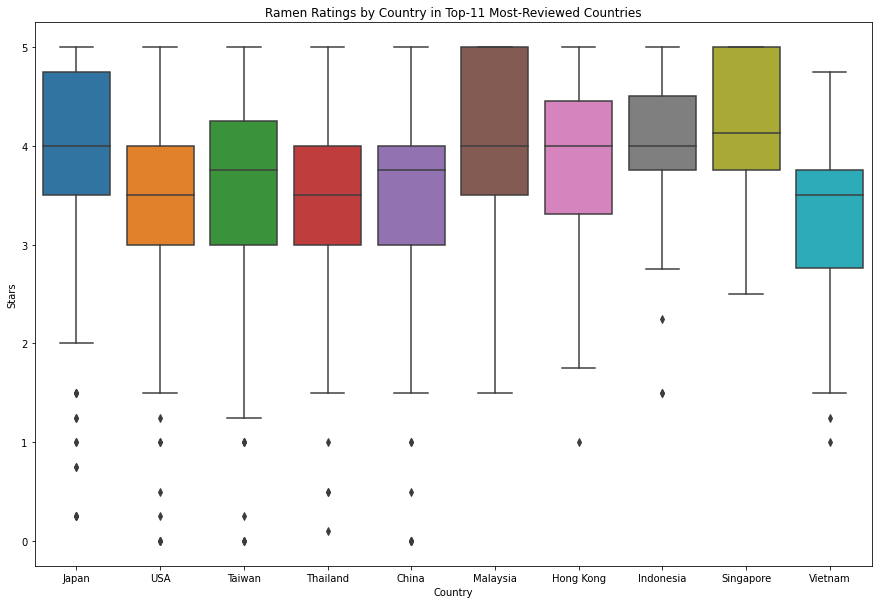

In [29]:
### Visualize Comparisons of top 11 Countries ###
plt.figure(figsize=(15,10))
sns.boxplot(data=train_top11, x='Country', y='Stars')
plt.title('Ramen Ratings by Country in Top-11 Most-Reviewed Countries')
plt.show()

In [30]:
### Create new column is_Japan ###
train_top11['is_Japan'] = train_top11.Country == 'Japan'
train_top11.sample(5)

,Review #,Brand,Variety,Style,Country,Stars,is_Japan
2107,473,Myojo,Ramen-Desse Miso Soybean Paste,Bowl,Japan,4.5,True
682,1898,Master Kong,Spicy Fish Noodle,Bowl,China,3.0,False
480,2100,Myojo,Mee Goreng Original Flavour,Pack,Singapore,4.0,False
1373,1207,Nissin,UFO Yakisoba With Wasabi Mayonnaise,Bowl,Japan,5.0,True
1146,1434,Maggi,Hot Cup Perisa Kari,Cup,Malaysia,3.5,False


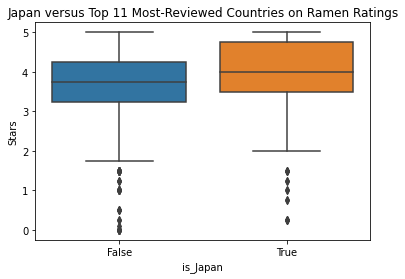

In [31]:
### Visualize Comparison between Japan and all of top 11 ###
sns.boxplot(data=train_top11, x='is_Japan', y='Stars')
plt.title('Japan versus Top 11 Most-Reviewed Countries on Ramen Ratings')
plt.show()

In [32]:
### Hypothesis Testing ###
alpha = .05
t, p = stats.mannwhitneyu(train_top11[train_top11.is_Japan == True].Stars, 
                          train_top11[train_top11.is_Japan == False].Stars,
                          alternative='greater')

if t > 0 and p < alpha:
    print('Japan statistically produces better-rated ramen than the rest.\n\
            We reject the null hypothesis with 95% confidence.')
else:
    print('Japan does not statistically produce better-rated ramen than the rest.\n\
            Results do not breach the 95% confidence threshold.')

Japan statistically produces better-rated ramen than the rest.
            We reject the null hypothesis with 95% confidence.
